<a href="https://colab.research.google.com/github/Vizzuality/copernicus-climate-data/blob/master/prepare_zonal_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare data for the copernicus-climate project

https://github.com/Vizzuality/copernicus-climate-data

`Edward P. Morris (vizzuality.)`

## Description
This notebook transforms time series arrays of climate data into zonal statistical summaries. 

```
MIT License

Copyright (c) 2020 Vizzuality

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```

# Setup

Instructions for setting up the computing environment.

In [0]:
%%bash
# Remove sample_data
rm -r sample_data

## Linux dependencies

Instructions for adding linux (including node, ect.) system packages. 

In [0]:
#!apt install -q -y [package-name]
#!npm install -g [package-name]

In [0]:
# Packages for projections and geospatial processing
!apt install -q -y libspatialindex-dev libproj-dev proj-data proj-bin libgeos-dev

Reading package lists...
Building dependency tree...
Reading state information...
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev libspatialindex-c4v5 libspatialindex-dev
  libspatialindex4v5 proj-bin
0 upgraded, 6 newly installed, 0 to remove and 29 not upgraded.
Need to get 860 kB of archives.
After this operation, 5,014 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4

## Python packages

Consider using package versions to ensure nothing changes.

`!pip install -q <package-name>`

In [0]:
# connect to Google cloud storage
!pip install -q gcsfs 

In [0]:
# geospatial tools
!pip install -q country-converter geopandas

     |████████████████████████████████| 51kB 3.7MB/s 
     |████████████████████████████████| 931kB 25.3MB/s 
     |████████████████████████████████| 10.9MB 47.9MB/s 
     |████████████████████████████████| 14.7MB 319kB/s 


In [0]:
# xarray and Zarr tools
!pip install -q cftime netcdf4 nc-time-axis zarr xarray xclim rioxarray regionmask sparse xarray-extras

     |████████████████████████████████| 327kB 9.4MB/s 
     |████████████████████████████████| 4.1MB 43.4MB/s 
     |████████████████████████████████| 3.3MB 56.9MB/s 
     |████████████████████████████████| 112kB 49.5MB/s 
     |████████████████████████████████| 3.7MB 57.6MB/s 
     |████████████████████████████████| 122kB 61.6MB/s 
     |████████████████████████████████| 71kB 9.9MB/s 
     |████████████████████████████████| 3.8MB 45.2MB/s 
     |████████████████████████████████| 194kB 46.4MB/s 
     |████████████████████████████████| 174kB 54.6MB/s 
     |████████████████████████████████| 71kB 9.9MB/s 
     |████████████████████████████████| 18.1MB 142kB/s 
     |████████████████████████████████| 14.4MB 322kB/s 
     |████████████████████████████████| 634kB 52.2MB/s 
     |████████████████████████████████| 225kB 57.9MB/s 
     |████████████████████████████████| 501kB 60.6MB/s 


In [0]:
!pip install salem

     |████████████████████████████████| 81kB 5.2MB/s 


In [0]:
# Show python package versions
!pip list

Package                  Version        
------------------------ ---------------
absl-py                  0.9.0          
affine                   2.3.0          
alabaster                0.7.12         
albumentations           0.1.12         
altair                   4.1.0          
asciitree                0.3.3          
asgiref                  3.2.7          
astor                    0.8.1          
astropy                  4.0.1.post1    
astunparse               1.6.3          
atari-py                 0.2.6          
atomicwrites             1.4.0          
attrs                    19.3.0         
audioread                2.1.8          
autograd                 1.3            
Babel                    2.8.0          
backcall                 0.1.0          
beautifulsoup4           4.6.3          
bleach                   3.1.5          
blis                     0.4.1          
bokeh                    1.4.0          
boltons                  20.1.0         
boto            

## Authorisation

Setting up connections and authorisation to cloud services.

### Google Cloud

This can be done in the URL or via adding service account credentials.

If you do not share the notebook, you can mount your Drive and and transfer credentials to disk. Note if the notebook is shared you always need to authenticate via URL.  

In [0]:
# Set Google Cloud information
gc_project = "skydipper-196010"
gc_creds = "skydipper-196010-f842645fd0f3.json"
gc_user = "edward-morris@skydipper-196010.iam.gserviceaccount.com"
gcs_prefix = "gs://copernicus-climate"

In [0]:
# For auth WITHOUT service account
# https://cloud.google.com/resource-manager/docs/creating-managing-projects
#from google.colab import auth
#auth.authenticate_user()
#!gcloud config set project {project_id}

In [0]:
# If the notebook is shared
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
# If Drive is mounted, copy GC credentials to home (place in your GDrive, and connect Drive)
!cp "/content/drive/My Drive/{gc_creds}" "/root/.{gc_creds}"

In [0]:
# Auth WITH service account
!gcloud auth activate-service-account {gc_user} --key-file=/root/.{gc_creds} --project={gc_project}

Activated service account credentials for: [edward-morris@skydipper-196010.iam.gserviceaccount.com]


In [0]:
# Test GC auth
!gsutil ls {gcs_prefix}

gs://copernicus-climate/heatwaves_historical_Basque.zip
gs://copernicus-climate/heatwaves_longterm_Basque.zip
gs://copernicus-climate/spain.zarr.zip
gs://copernicus-climate/coldsnaps/
gs://copernicus-climate/data_for_PET/
gs://copernicus-climate/dataset/
gs://copernicus-climate/european-nuts-lau-geometries.zarr/
gs://copernicus-climate/heatwaves/
gs://copernicus-climate/pet/
gs://copernicus-climate/spain.zarr/
gs://copernicus-climate/tasmax/
gs://copernicus-climate/tasmin/
gs://copernicus-climate/to_delete/


# Utils

Generic helper functions used in the subsequent processing. For easy navigation each function seperated into a section with the function name.

## copy_gcs

In [0]:
import os
import subprocess

def copy_gcs(source_list, dest_list, opts=""):
  """
  Use gsutil to copy each corresponding item in source_list
  to dest_list.

  Example:
  copy_gcs(["gs://my-bucket/data-file.csv"], ["."])

  """
  for s, d  in zip(source_list, dest_list):
    cmd = f"gsutil -m cp -r {opts} {s} {d}"
    print(f"Processing: {cmd}")
    r = subprocess.call(cmd, shell=True)
    if r == 0:
        print("Task created")
    else:
        print("Task failed")
  print("Finished copy")

## set_acl_to_public

In [0]:
import subprocess

# Set to asset permissions to public for https read
def set_acl_to_public(gs_path):
  """ 
  Set all Google Storage assets to puplic read access.

  Requires GS authentication

  Parameters
  ----------
  gs_path str
    The google storage path, note the "-r" option is used, setting the acl of all assets below this path
  """
  cmd = f"gsutil -m acl -r ch -u AllUsers:R {gs_path}"
  print(cmd)
  r = subprocess.call(cmd, shell=True)
  if r is 0:
    print("Set acl(s) sucsessful")
  else:
    print("Set acl(s) failed")  

#set_acl_to_public("gs://skydipper-water-quality/cloud-masks")

## get_cached_remote_zarr

In [0]:
import gcsfs
import zarr
import xarray as xr



def get_cached_remote_zarr(
    group,
    root,
    project_id = gc_project,
    token=f"/root/.{gc_creds}"
    ):
  
  # Connect to GS
  gc = gcsfs.GCSFileSystem(project=project_id, token=token)
  store = gc.get_mapper(root, check=False, create=True)
  # Check zarr is consolidated
  consolidated = gc.exists(f'{root}/.zmetadata')
  # Cache the zarr store
  #store = zarr.ZipStore(store, mode='r')
  cache = zarr.LRUStoreCache(store, max_size=None)
  # Return cached zarr group
  return xr.open_zarr(cache, group=group, consolidated=consolidated)

## get_gda_geoms

In [0]:
import geopandas as gpd
import shapely

def get_gda_geoms(group, root, select_by=None):
  gda = get_cached_remote_zarr(group, root = root)
  # Select
  if select_by:
    gda = gda.sel(select_by, drop=True)
  df = gda.reset_coords().to_dataframe().dropna().reset_index()
  geoms = df.geometry
  # Return as geopandas object, converting geometry to shapley objects
  return gpd.GeoDataFrame(df, geometry=[shapely.wkb.loads(g, True) for g in geoms])


## interpolate_dataset

In [0]:
import numpy as np

def interpolate_dataset(ds, dx, dy):
  # get bounds
  lon = ds.lon.values
  lat = ds.lat.values
  lonmin = lon.min()
  latmin = lat.min()
  lonmax = lon.max()
  latmax = lat.max()
  # create new lat and lon
  new_lon = np.arange(lonmin, lonmax, step=dx)
  #new_lon = np.linspace(lonmin, lonmax, num=ds.dims['lon'] * factor)
  #print(new_lon)
  new_lat = np.arange(latmin, latmax, step=dy)
  #new_lat = np.linspace(latmin, latmax, num=ds.dims['lat'] * factor)
  #print(new_lat)
  # convert na values
  #filled = ds.fillna(-9999)
  # interpolate
  out = ds.interp(lat=new_lat, lon=new_lon, method='linear')
  # fill na gaps
  out = out.interpolate_na('lon').interpolate_na('lat')
  # return masked array
  return out #.where(out > -1)

## add_area

In [0]:
import numpy as np
import numpy.matlib
import xarray as xr
import rioxarray

def add_area(ds):
  """
  Add DataArrays of the area in km2 and area weight of each array cell

  """
  # get info
  lon = ds.lon.values
  lat = ds.lat.values
  xdim = len(lon)
  ydim = len(lat)
  lonmin = lon.min()
  latmin = lat.min()
  lonmax = lon.max()
  latmax = lat.max()
  xres = (lonmax - lonmin) / xdim
  yres = (latmax - latmin) / ydim 
  
  # create lats + yres
  lats = np.linspace(int(latmin), int(latmax) + yres, ydim + 1)
  
  # constants
  a = 6378137
  b = 6356752.3142

  # Degrees to radians
  lats = lats * np.pi/180

  # Intermediate vars
  e = np.sqrt(1-(b/a)**2)
  sinlats = np.sin(lats)
  zm = 1 - e * sinlats
  zp = 1 + e * sinlats

  # Distance between meridians
  q = yres/360
  # q = pix_width/360

  # Compute areas for each latitude in square km
  areas_to_equator = np.pi * b**2 * ((2*np.arctanh(e*sinlats) / (2*e) + sinlats / (zp*zm))) / 10**6
  areas_between_lats = np.diff(areas_to_equator)
  areas_cells = np.abs(areas_between_lats) * q
  areagrid = np.transpose(np.matlib.repmat(areas_cells, xdim, 1))
  
  # Sum total area
  #tot_area = np.sum(areagrid)

  # Add area in km2
  da = xr.DataArray(
      data=areagrid,
      name='area_km2',
      coords=[lat, lon],
      dims=['lat', 'lon'], 
      attrs=None, indexes=None, fastpath=False)
  # Add area_weight
  #ds['area_weight'] = ds['area_km2'] / tot_area
  
  return ds.assign({'area_km2': da.chunk({'lat':-1, 'lon':-1})})



## set_lat_lon_attrs

In [0]:
def set_lat_lon_attrs(ds):
  """ Set CF latitude and longitude attributes"""
  ds["lon"] = ds.lon.assign_attrs({
    'axis' : 'X',
     'long_name' : 'longitude',
      'standard_name' : 'longitude',
       'stored_direction' : 'increasing',
        'type' : 'double',
         'units' : 'degrees_east',
          'valid_max' : 360.0,
           'valid_min' : -180.0
           })
  ds["lat"] = ds.lat.assign_attrs({
    'axis' : 'Y',
     'long_name' : 'latitude',
      'standard_name' : 'latitude',
       'stored_direction' : 'increasing',
        'type' : 'double',
         'units' : 'degrees_north',
          'valid_max' : 90.0,
           'valid_min' : -90.0
           })
  return ds
  

## create_ds_mask

In [0]:
import regionmask
import xarray as xr
import rioxarray
import geopandas
import numpy as np

def create_ds_mask(df, ds, id_prop, name_prop, name):
  
  # Get mean ds cell area (in degrees) 
  mean_y_size = np.diff(ds.lat.values).mean()
  #print(mean_y_size)
  mean_x_size = np.diff(ds.lat.values).mean()
  #print(mean_x_size)
  mean_area = mean_y_size * mean_x_size
  print(f"The mean ds cell area is {np.round(mean_area, 6)} deg.\n")
  
  # Clip gdf to bounding box of ds
  xmin = ds.lon.min().values.tolist()
  xmax = ds.lon.max().values.tolist()
  ymin = ds.lat.min().values.tolist()
  ymax = ds.lat.max().values.tolist()
  df = df.cx[xmin:xmax, ymin:ymax]
  
  
  # Add area of geoms to gdf
  df = df.assign(area = df.area)
  df = df.assign(area_is_gt_cell = df['area'] > mean_area)
  print(f"Clipped gdf to dataset bounds, giving {len(df[id_prop])} potential geometries, of which {df['area_is_gt_cell'].sum()} are large enough.\n")
  
  print("Geometries smaller than mean cell size:")
  print(df.loc[df['area_is_gt_cell'] == False, [id_prop, name_prop]])
  print("\n")

  # Extract geoms, codes, names, and create code_ints that are large enough!
  id_names = df.loc[df['area_is_gt_cell'] == True, name_prop].values
  #print(id_names)
  id_codes = df.loc[df['area_is_gt_cell'] == True, id_prop].values
  #print(id_codes)
  geoms = df.loc[df['area_is_gt_cell'] == True, 'geometry'].values
  id_ints = list(range(0, len(id_codes)))
  #print(id_ints)

  # create mask object
  m = regionmask.Regions(
    name = name,
    numbers = id_ints,
    names = id_names,
    abbrevs = id_codes,
    outlines = geoms)\
    .mask(ds)\
    .rename(name)
  
  # get the ints written to mask
  d = dict(zip(id_ints, id_names))
  #print(d)
  d2 = dict(zip(id_ints, id_codes))
  #print(d2)
  id_ints2 = m.to_dataframe().dropna()[name].unique() 
  #print(id_ints2)
  id_names2 = [d[k] for k in [int(i) for i in id_ints2]]
  id_codes2 = [d2[k] for k in [int(i) for i in id_ints2]]
  
  print(f"Finished writing {len(id_codes2)} geometries to {name} mask.\n")
  
  # update da attributes
  m.attrs['id_ints'] = id_ints2
  m.attrs['id_codes'] = id_codes2  
  m.attrs['id_names'] = id_names2
  m = set_lat_lon_attrs(m)
  return m
  

## area_wt_mean

In [0]:
import shapely
import pandas as pd

def area_wt_mean(ds, vars, id_prop, mask):
  da = (ds[vars] * ds.area_km2).groupby(ds[mask]).sum(skipna=True)
  area = ds.area_km2.groupby(ds[mask]).sum(skipna=True).rename("total_area")
  da = (da / area)\
  .rename( dict(zip(vars, [f"{var}_mean" for var in vars])))
  da = da.rename({mask:id_prop})
  # convert gid to codes
  a = ds[mask].attrs['id_ints']
  d = dict(zip(ds[mask].attrs['id_ints'], ds[mask].attrs['id_codes']))
  da[id_prop] = [d[k] for k in a]
  return da.chunk({id_prop:-1})

## area_mean

In [0]:
import shapely

def area_mean(ds, vars, id_prop, mask):
  da = (ds[vars]).groupby(ds[mask]).mean(skipna=True)\
  .rename( dict(zip(vars, [f"{var}_mean" for var in vars])))
  id_ints = da[mask].values.astype(numpy.int64) 
  id_codes = ds[mask].attrs['id_codes']
  id_codes = [id_codes[i] for i in id_ints]
  da = da.rename({mask:id_prop})
  da = da.assign_coords({id_prop:id_codes})
  return da.chunk({id_prop:-1})

## write_to_remote_zarr

In [0]:
import gcsfs
import zarr
import xarray as xr

def write_to_remote_zarr(
    ds,
    group,
    root,
    unchunk_coords = True,
    project_id = gc_project,
    token=f"/root/.{gc_creds}",
    show_tree = True
    ):
  
  # Connect to GS
  gc = gcsfs.GCSFileSystem(project=project_id, token=token)
  store = gc.get_mapper(root, check=False, create=True)
  
  # consolidate metadata at root
  zarr.consolidate_metadata(store)
  
  # Write to zarr group
  ds.to_zarr(store=store, group=group, mode="w", consolidated=True)
  
  # consolidate metadata at root
  zarr.consolidate_metadata(store)
  c = gc.exists(f"{root}/.zmetadata")
  print(f"{root} is consoldiated? {c}")
  # unchunk coordinates
  # TODO: optimise this for remote ZARR
  #if unchunk_coords:
  #  unchunk_dataset(store, coords_only = True)
  if show_tree:
    with zarr.open_consolidated(store, mode='r') as z:
      print(z.tree())




# Processing

Data processing organised into sections.

## Get datasets

In [0]:
%%time
# Create remote ZARR
his = get_cached_remote_zarr(group = 'historical-monthly', root = "copernicus-climate/spain.zarr")
print(his)

<xarray.Dataset>
Dimensions:            (lat: 91, lon: 151, time: 468)
Coordinates:
  * lat                (lat) float64 35.0 35.1 35.2 35.3 ... 43.7 43.8 43.9 44.0
  * lon                (lon) float64 -10.0 -9.9 -9.8 -9.7 ... 4.7 4.8 4.9 5.0
  * time               (time) datetime64[ns] 1981-01-01 ... 2019-12-01
Data variables:
    coldsnap_alarms    (time, lat, lon) int64 dask.array<chunksize=(120, 91, 151), meta=np.ndarray>
    coldsnap_alerts    (time, lat, lon) int64 dask.array<chunksize=(120, 91, 151), meta=np.ndarray>
    coldsnap_warnings  (time, lat, lon) int64 dask.array<chunksize=(120, 91, 151), meta=np.ndarray>
    heatwave_alarms    (time, lat, lon) int64 dask.array<chunksize=(120, 91, 151), meta=np.ndarray>
    heatwave_alerts    (time, lat, lon) int64 dask.array<chunksize=(120, 91, 151), meta=np.ndarray>
    heatwave_warnings  (time, lat, lon) int64 dask.array<chunksize=(120, 91, 151), meta=np.ndarray>
    petmax             (time, lat, lon) float32 dask.array<chunksize=(

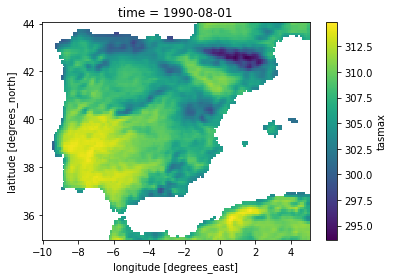

In [0]:
#his.tasmax.sel(time='1990-08-01').plot()

In [0]:
%%time
seas = get_cached_remote_zarr(group = 'future-seasonal-monthly', root = "copernicus-climate/spain.zarr")
print(seas)

<xarray.Dataset>
Dimensions:            (lat: 91, lon: 151, model: 6, time: 6)
Coordinates:
  * lat                (lat) float64 35.0 35.1 35.2 35.3 ... 43.7 43.8 43.9 44.0
  * lon                (lon) float64 -10.0 -9.9 -9.8 -9.7 ... 4.7 4.8 4.9 5.0
  * model              (model) object 'cmcc_3' 'dwd_2' ... 'ncep_2' 'ukmo_14'
  * time               (time) datetime64[ns] 2020-02-01 ... 2020-07-01
Data variables:
    coldsnap_alarms    (time, model, lat, lon) float64 dask.array<chunksize=(6, 6, 91, 151), meta=np.ndarray>
    coldsnap_alerts    (time, model, lat, lon) float64 dask.array<chunksize=(6, 6, 91, 151), meta=np.ndarray>
    coldsnap_warnings  (time, model, lat, lon) float64 dask.array<chunksize=(6, 6, 91, 151), meta=np.ndarray>
    heatwave_alarms    (time, model, lat, lon) float64 dask.array<chunksize=(6, 6, 91, 151), meta=np.ndarray>
    heatwave_alerts    (time, model, lat, lon) float64 dask.array<chunksize=(6, 6, 91, 151), meta=np.ndarray>
    heatwave_warnings  (time, mode

/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


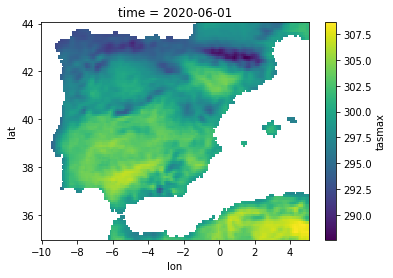

In [0]:
seas.tasmax.sel(time='2020-06-01').mean('model').plot()

In [0]:
%%time
fut = get_cached_remote_zarr(group = 'future-longterm-yr10', root = "copernicus-climate/spain.zarr")
print(fut)

<xarray.Dataset>
Dimensions:            (experiment: 2, lat: 91, lon: 151, model: 5, time: 8)
Coordinates:
  * experiment         (experiment) object 'rcp45' 'rcp85'
  * lat                (lat) float64 35.0 35.1 35.2 35.3 ... 43.7 43.8 43.9 44.0
  * lon                (lon) float64 -10.0 -9.9 -9.8 -9.7 ... 4.7 4.8 4.9 5.0
  * model              (model) object 'ACCESS1-0' 'BNU-ESM' ... 'NorESM1-M'
  * time               (time) datetime64[ns] 2020-01-01 ... 2090-01-01
Data variables:
    coldsnap_alarms    (time, model, experiment, lat, lon) float64 dask.array<chunksize=(8, 5, 1, 91, 151), meta=np.ndarray>
    coldsnap_alerts    (time, model, experiment, lat, lon) float64 dask.array<chunksize=(8, 5, 1, 91, 151), meta=np.ndarray>
    coldsnap_warnings  (time, model, experiment, lat, lon) float64 dask.array<chunksize=(8, 5, 1, 91, 151), meta=np.ndarray>
    heatwave_alarms    (time, model, experiment, lat, lon) float64 dask.array<chunksize=(8, 5, 1, 91, 151), meta=np.ndarray>
    heatwave

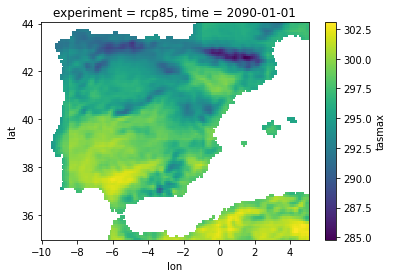

In [0]:
tst = fut.tasmax.sel(time='2090-01-01', experiment='rcp85').mean('model')
tst.where(tst > 0).plot()

In [0]:
%%time
gda = get_cached_remote_zarr(group = 'nuts-2016-lau-2018', root = "copernicus-climate/european-nuts-lau-geometries.zarr")
print(gda)

<xarray.Dataset>
Dimensions:      (gid: 104568)
Coordinates:
    admin_level  (gid) int64 dask.array<chunksize=(104568,), meta=np.ndarray>
    geoname      (gid) object dask.array<chunksize=(26142,), meta=np.ndarray>
  * gid          (gid) object 'AL' 'CZ' 'DE' ... 'UK_W06000023' 'UK_W06000024'
    iso3         (gid) object dask.array<chunksize=(26142,), meta=np.ndarray>
Data variables:
    geometry     (gid) object dask.array<chunksize=(26142,), meta=np.ndarray>
Attributes:
    crs:                 EPSG:4326
    geospatial_lat_max:  75.814181
    geospatial_lat_min:  26.018616
    geospatial_lon_max:  69.103165
    geospatial_lon_min:  61.78629
    history:             Created by combining `ref-nuts-2016-01m` and `LAU-20...
    keywords:            Statistical units, NUTS, LAU
    summary:             This dataset represents the regions for levels 1, 2 ...
    title:               European Union Nomenclature of Territorial Units for...
CPU times: user 29.9 ms, sys: 9.12 ms, total: 39.

CPU times: user 3.99 s, sys: 1.13 s, total: 5.12 s
Wall time: 4.45 s


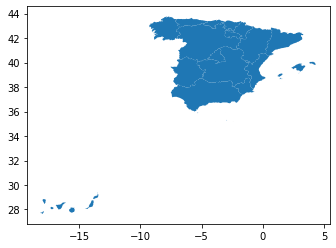

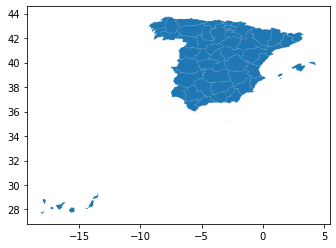

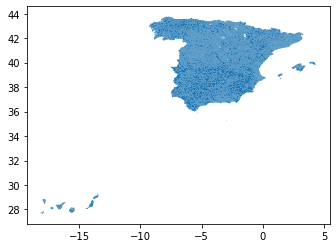

In [0]:
%%time
# Select nuts-lau level 2, 3 and 4 
import shapely
import geopandas

# using mask and where
mask = (gda.admin_level > 1) & (gda.iso3 == 'ESP') 
es = gda.where(mask, drop=True)

# Convert to geodataframe
df = es.reset_coords().to_dataframe().dropna().reset_index()
geoms = [shapely.wkb.loads(g, hex=True) for g in es.geometry.values]
# Return as geopandas object, converting geometry to shapley objects
gdf = gpd.GeoDataFrame(df, geometry = geoms)

# Select ESP admin levels
es2 = gdf.loc[gdf.admin_level == 2]
es3 = gdf.loc[gdf.admin_level == 3]
es4 = gdf.loc[gdf.admin_level == 4]

# Plot
es2.plot()
es3.plot()
es4.plot()

In [0]:
# Find smallest geometry area
mean_area_es2 = es2.area.min()
mean_area_es3 = es3.area.min()
mean_area_es4 = es4.area.mean()


In [0]:
print(np.sqrt(mean_area_es2))
print(np.sqrt(mean_area_es3))
print(np.sqrt(mean_area_es4))

0.03725370399270454
0.03725370399270454
0.08111702940265939


## Zonal stats

### Historical

In [0]:
def zonal_stats_his(level):
  if level < 4:
    dx=0.03; dy=0.03
  else:
    dx=0.01; dy=0.01  
  # Interpolate
  hisi = interpolate_dataset(his, dx, dy)
  # Add area array to datasets
  hisi = add_area(hisi)
  # Create masks and add to datasets
  if level == 2: gdf = es2
  if level == 3: gdf = es3
  if level == 4: gdf = es4
  mask = create_ds_mask(gdf, hisi, 'gid', 'geoname', f"nuts_{level}")
  hisi = xr.merge([hisi, mask])
  # Area weighted mean per time
  # Historical, level 2, 3 and 4
  dvars = ['tasmax', 'tasmin', 'heatwave_alerts', 'heatwave_alarms', 'heatwave_warnings', 'coldsnap_alerts', 'coldsnap_alarms', 'coldsnap_warnings', 'petmax', 'petmin']
  id_prop = 'gid'
  out = area_wt_mean(hisi, dvars, id_prop, f"nuts_{level}")
  out = out.assign_coords(nuts_level = [level])
  out = out.assign_coords(theme = ['historical'])
  out = out.assign_coords(experiment = ['NA'])
  out = out.transpose('theme', 'nuts_level', 'experiment', 'gid', 'time')
  out = out.sortby(['theme', 'nuts_level', 'experiment', 'gid', 'time'])
  return out
  

In [0]:
#%%time
#levels = [2]
#his_ss = xr.merge([zonal_stats_his(l) for l in levels])
#print(his_ss)

### Seasonal

In [0]:
def mean_std_by_model(ds, dvars):
  sd = ds.std('model')
  dvarssd = [f"{v}_std" for v in dvars]  
  sd = sd.rename_vars(dict(zip(dvars, dvarssd))) 
  m = ds.mean('model')
  dvarsm = [f"{v}_mean" for v in dvars]  
  m = m.rename_vars(dict(zip(dvars, dvarsm))) 
  return xr.merge([m,sd]), dvarssd, dvarsm

def zonal_stats_seas(level):
  ds = seas
  dvars = ['tasmax', 'tasmin', 'heatwave_alerts', 'heatwave_alarms', 'heatwave_warnings', 'coldsnap_alerts', 'coldsnap_alarms', 'coldsnap_warnings']
  # Calculate mean and sd per experiment by model
  ds, dvarssd, dvarsm = mean_std_by_model(ds, dvars)
  if level < 4:
    dx=0.03; dy=0.03
  else:
    dx=0.01; dy=0.01  
  # Interpolate
  dsi = interpolate_dataset(ds, dx, dy)
  # Add area array to datasets
  dsi = add_area(dsi)
  # Create masks and add to datasets
  if level == 2: gdf = es2
  if level == 3: gdf = es3
  if level == 4: gdf = es4
  mask = create_ds_mask(gdf, dsi, 'gid', 'geoname', f"nuts_{level}")
  dsi = xr.merge([dsi, mask])
  # Area weighted mean per time
  id_prop = 'gid'
  ds_ss_m = area_wt_mean(dsi, dvarsm, id_prop, f"nuts_{level}")
  ds_ss_sd = area_wt_mean(dsi, dvarssd, id_prop, f"nuts_{level}")
  out = xr.merge([ds_ss_m, ds_ss_sd])
  out = out.assign_coords(nuts_level = [level])
  out = out.assign_coords(theme = ['future-seasonal'])
  out = out.assign_coords(experiment = ['NA'])
  out = out.transpose('theme', 'nuts_level', 'experiment', 'gid', 'time')
  out = out.sortby(['theme', 'nuts_level', 'experiment', 'gid', 'time'])
  # Rename
  d = dict(zip([f"{v}_mean" for v in dvarsm + dvarssd], dvarsm + dvarssd))
  out = out.rename_vars(d)
  return out

In [0]:
#%%time
#levels = [2]
#seas_ss = xr.merge([zonal_stats_seas(l) for l in levels])
#print(seas_ss)

### Longterm

In [0]:
def mean_std_by_model(ds, dvars):
  sd = ds.std('model')
  dvarssd = [f"{v}_std" for v in dvars]  
  sd = sd.rename_vars(dict(zip(dvars, dvarssd))) 
  m = ds.mean('model')
  dvarsm = [f"{v}_mean" for v in dvars]  
  m = m.rename_vars(dict(zip(dvars, dvarsm))) 
  return xr.merge([m,sd]), dvarssd, dvarsm

def zonal_stats_fut(level):
  ds = fut
  dvars = ['tasmax', 'tasmin', 'heatwave_alerts', 'heatwave_alarms', 'heatwave_warnings', 'coldsnap_alerts', 'coldsnap_alarms', 'coldsnap_warnings']
  # Calculate mean and sd per experiment by model
  ds, dvarssd, dvarsm = mean_std_by_model(ds, dvars)
  if level < 4:
    dx=0.03; dy=0.03
  else:
    dx=0.01; dy=0.01  
  # Interpolate
  dsi = interpolate_dataset(ds, dx, dy)
  # Add area array to datasets
  dsi = add_area(dsi)
  # Create masks and add to datasets
  if level == 2: gdf = es2
  if level == 3: gdf = es3
  if level == 4: gdf = es4
  mask = create_ds_mask(gdf, dsi, 'gid', 'geoname', f"nuts_{level}")
  dsi = xr.merge([dsi, mask])
  # Area weighted mean per time
  id_prop = 'gid'
  ds_ss_m = area_wt_mean(dsi, dvarsm, id_prop, f"nuts_{level}")
  ds_ss_sd = area_wt_mean(dsi, dvarssd, id_prop, f"nuts_{level}")
  out = xr.merge([ds_ss_m, ds_ss_sd])
  out = out.assign_coords(nuts_level = [level])
  out = out.assign_coords(theme = ['future-longterm'])
  out = out.transpose('theme', 'nuts_level', 'experiment', 'gid', 'time')
  out = out.sortby(['theme', 'nuts_level', 'experiment', 'gid', 'time'])
  # Rename
  d = dict(zip([f"{v}_mean" for v in dvarsm + dvarssd], dvarsm + dvarssd))
  out = out.rename_vars(d)
  return out

In [0]:
#%%time
#levels = [2]
#fut_ss = xr.merge([zonal_stats_fut(l) for l in levels])
#print(fut_ss)

## Combine

In [0]:
%%time
# Combine all the zonal stats summaries
levels = [2, 3, 4]
his_ss = xr.merge([zonal_stats_his(l) for l in levels])#.to_dataframe()
seas_ss = xr.merge([zonal_stats_seas(l) for l in levels])#.to_dataframe()
fut_ss = xr.merge([zonal_stats_fut(l) for l in levels])#.to_dataframe()

The mean ds cell area is 0.0009 deg.

Clipped gdf to dataset bounds, giving 18 potential geometries, of which 18 are large enough.

Geometries smaller than mean cell size:
Empty GeoDataFrame
Columns: [gid, geoname]
Index: []


Finished writing 18 geometries to nuts_2 mask.

The mean ds cell area is 0.0009 deg.

Clipped gdf to dataset bounds, giving 52 potential geometries, of which 52 are large enough.

Geometries smaller than mean cell size:
Empty GeoDataFrame
Columns: [gid, geoname]
Index: []


Finished writing 52 geometries to nuts_3 mask.

The mean ds cell area is 0.0001 deg.

Clipped gdf to dataset bounds, giving 8036 potential geometries, of which 8018 are large enough.

Geometries smaller than mean cell size:
           gid                   geoname
232   ES_03017      Alqueria D'Asnar, L'
971   ES_08032           Caldes D'Estrac
1112  ES_08174                Puigdàlber
1152  ES_08215  Sant Hipòlit De Voltregà
1947  ES_12067                     Geldo
2575  ES_17046  Castellfolli

/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.p

The mean ds cell area is 0.0009 deg.

Clipped gdf to dataset bounds, giving 18 potential geometries, of which 18 are large enough.

Geometries smaller than mean cell size:
Empty GeoDataFrame
Columns: [gid, geoname]
Index: []


Finished writing 18 geometries to nuts_2 mask.

The mean ds cell area is 0.0009 deg.

Clipped gdf to dataset bounds, giving 52 potential geometries, of which 52 are large enough.

Geometries smaller than mean cell size:
Empty GeoDataFrame
Columns: [gid, geoname]
Index: []


Finished writing 52 geometries to nuts_3 mask.

The mean ds cell area is 0.0001 deg.

Clipped gdf to dataset bounds, giving 8036 potential geometries, of which 8018 are large enough.

Geometries smaller than mean cell size:
           gid                   geoname
232   ES_03017      Alqueria D'Asnar, L'
971   ES_08032           Caldes D'Estrac
1112  ES_08174                Puigdàlber
1152  ES_08215  Sant Hipòlit De Voltregà
1947  ES_12067                     Geldo
2575  ES_17046  Castellfolli

/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.p

CPU times: user 1h 52min 34s, sys: 28min 6s, total: 2h 20min 41s
Wall time: 1h 42min 23s


In [0]:
# Write CSV to GCS
%%time
import gcsfs
fs = gcsfs.GCSFileSystem(project=gc_project, token=f"/root/.{gc_creds}")

with fs.open(f"{gcs_prefix}/zonal_stats/historical_nuts-234.csv", 'w') as f:
  his_ss.to_dataframe().reset_index(drop=False).to_csv(f, index=False)
with fs.open(f"{gcs_prefix}/zonal_stats/future-seasonal_nuts-234.csv", 'w') as f:
  seas_ss.to_dataframe().reset_index(drop=False).to_csv(f, index=False)
with fs.open(f"{gcs_prefix}/zonal_stats/future-longterm_nuts-234.csv", 'w') as f:
  fut_ss.to_dataframe().reset_index(drop=False).to_csv(f, index=False)

/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.p

CPU times: user 1h 26min 39s, sys: 26min 35s, total: 1h 53min 15s
Wall time: 1h 14min 31s


In [0]:
s# Write to Zarr
#write_to_remote_zarr(out,'time-series_nuts-234','copernicus-climate/spain.zarr')